In [2]:
library(tidyverse)
library(ggalluvial)
library(repr)

Warning message:
"Paket 'tidyverse' wurde unter R Version 4.1.3 erstellt"
Warning message:
"Paket 'tibble' wurde unter R Version 4.1.3 erstellt"
Warning message:
"Paket 'tidyr' wurde unter R Version 4.1.3 erstellt"
Warning message:
"Paket 'readr' wurde unter R Version 4.1.3 erstellt"
Warning message:
"Paket 'purrr' wurde unter R Version 4.1.3 erstellt"
Warning message:
"Paket 'dplyr' wurde unter R Version 4.1.3 erstellt"
Warning message:
"Paket 'stringr' wurde unter R Version 4.1.3 erstellt"
Warning message:
"Paket 'forcats' wurde unter R Version 4.1.3 erstellt"
Warning message:
"Paket 'lubridate' wurde unter R Version 4.1.3 erstellt"
-- Attaching core tidyverse packages ---------------------------------------------------------------- tidyverse 2.0.0 --
v dplyr     1.1.2     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.3     v tibble    3.2.1
v lubridate 1.9.2     v tidyr     1.3.0
v purrr     1.0.1     
-- Conflicts ----------------------------------------

In [3]:
folder_name = "data_processing_231111_1929"
full_path = file.path("data_computed", folder_name)
vep_counts_raw = read.table(file.path(full_path, "figures/vep_counts.txt"), sep="\t", header=TRUE)

In [4]:
vep_counts = vep_counts_raw %>%
    filter(FoldX_cat %in% c("destabilizing", "neutral")) %>%
    mutate(AM_cat = case_when(
        AM_cat == 'ambiguous' ~ 'amb.',
        TRUE ~ AM_cat)
    )

vep_counts$FoldX_cat = factor(vep_counts$FoldX_cat, levels = c('neutral', 'destabilizing'))
vep_counts$AM_cat = factor(vep_counts$AM_cat, levels = c('benign', 'amb.', 'pathogenic'))
vep_counts$ESM_cat = factor(vep_counts$ESM_cat, levels = c('benign','pathogenic'))

Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
"Some strata appear at multiple axes."
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
"Some strata appear at multiple axes."
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
"Some strata appear at multiple axes."
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
"Some strata appear at multiple axes."
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
"Some strata appear at multiple axes."
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
"Some strata appear at multiple axes."


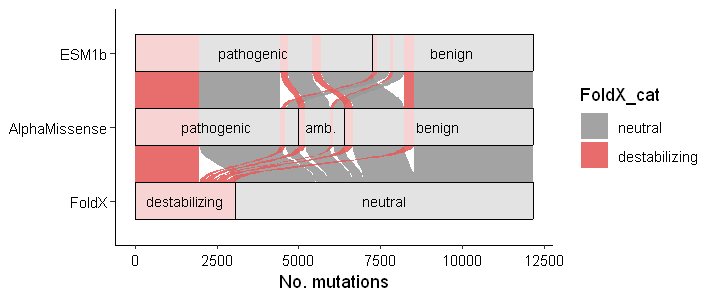

In [5]:
options(repr.plot.width=6, repr.plot.height=2.5)
ggplot(data = vep_counts,
       aes(axis1 = FoldX_cat,
           axis2 = AM_cat,
           axis3 = ESM_cat,
           y = count)) +
    geom_alluvium(aes(fill = FoldX_cat), width=1/2, alpha=0.9) +
    geom_stratum(alpha=0.7, width=1/2) +
    geom_text(stat = "stratum",
              aes(label = after_stat(stratum)), size=3) +
    scale_fill_manual(values=c('grey60', '#e55c5c'))+
    scale_x_discrete(limits = c("FoldX", "AlphaMissense", "ESM1b")) +
    ylab('No. mutations') +
    coord_flip() +
    theme_classic() +
    theme(axis.text = element_text(color = "black"))

figure_path = file.path(full_path, "figures/alluvial.pdf")
ggsave(filename = figure_path, plot = last_plot(), width = 6, height = 2.5, device = cairo_pdf, dpi = 300)

In [6]:
vep_counts_raw = read.table(file.path(full_path, "figures/vep_counts_AM_only.txt"), sep="\t", header=TRUE)

vep_counts = vep_counts_raw %>%
    filter(FoldX_cat %in% c("destabilizing", "neutral")) %>%
    mutate(AM_cat = case_when(
        AM_cat == 'ambiguous' ~ 'amb.',
        TRUE ~ AM_cat)
    )

vep_counts$FoldX_cat = factor(vep_counts$FoldX_cat, levels = c('neutral', 'destabilizing'))
vep_counts$AM_cat = factor(vep_counts$AM_cat, levels = c('benign', 'amb.', 'pathogenic'))

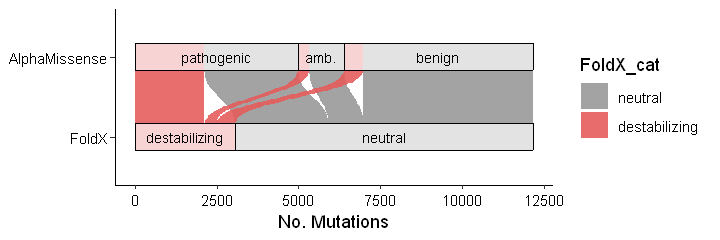

In [9]:
options(repr.plot.width=6, repr.plot.height=2)
ggplot(data = vep_counts,
       aes(axis1 = FoldX_cat,
           axis2 = AM_cat,
           y = count)) +
    geom_alluvium(aes(fill = FoldX_cat), width=1/3, alpha=0.9) +
    geom_stratum(alpha=0.7, width=1/3) +
    geom_text(stat = "stratum",
              aes(label = after_stat(stratum)), size=3) +
    scale_fill_manual(values=c('grey60', '#e55c5c'))+
    scale_x_discrete(limits = c("FoldX", "AlphaMissense")) +
    ylab('No. Mutations') +
    coord_flip() +
    theme_classic() +
    theme(axis.text = element_text(color = "black"))

figure_path = file.path(full_path, "figures/alluvial_AM_only.pdf")
ggsave(filename = figure_path, plot = last_plot(), width = 6, height = 2.5, device = cairo_pdf, dpi = 300)